<a href="https://colab.research.google.com/github/JennGuz/NLP-project-tutorial/blob/main/NLP_project_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [260]:
spam_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
spam_data.sample(10)

,url,is_spam
2017,https://www.npr.org/2020/06/29/874458692/supre...,False
1936,https://www.theskimm.com/picks/beach-products-...,True
2356,http://snarkmarket.com/2010/4890,False
2253,https://www.vox.com/21294603/your-news-update-...,False
614,https://techcrunch.com/2020/06/22/mschf-finger...,False
2188,https://www.businesscasual.fm/,True
563,https://mailchi.mp/bigspaceship/big-spaceships...,False
1790,https://www.publishersweekly.com/,False
2844,https://numlock.substack.com/p/numlock-sunday-...,True
688,http://us9.forward-to-friend.com/forward,True


In [261]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


is_spam
False    2303
True      696
Name: count, dtype: int64


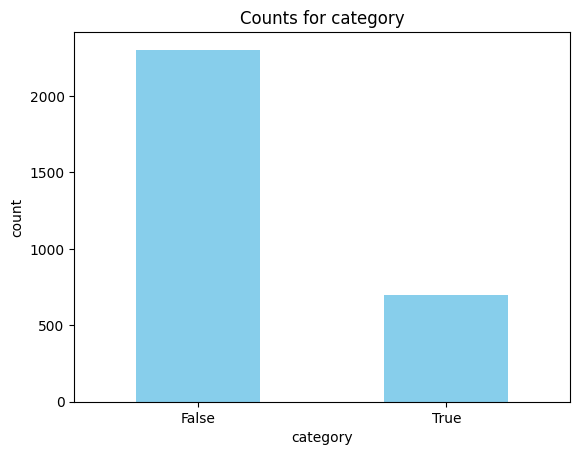

In [262]:
counts = spam_data['is_spam'].value_counts()
print(counts)

counts.plot(kind='bar', color='skyblue')

plt.title('Counts for category')
plt.xlabel('category')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [263]:
spam_data.describe()

,url,is_spam
count,2999,2999
unique,2369,2
top,https://www.bloomberg.com/tosv2.html,False
freq,26,2303


In [264]:
spam_data.isnull().sum()

,0
url,0
is_spam,0


In [265]:
spam_data.duplicated().sum()

630

In [266]:
spam_data = spam_data.drop_duplicates()
spam_data = spam_data.reset_index(drop=True, inplace=False)
spam_data.duplicated().sum()

0

is_spam
False    2125
True      244
Name: count, dtype: int64


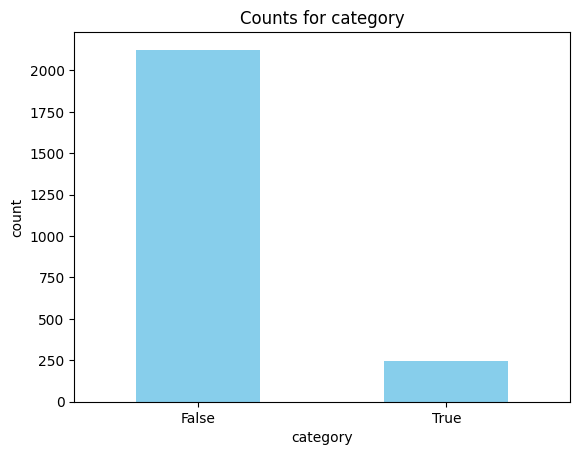

In [267]:
counts = spam_data['is_spam'].value_counts()
print(counts)

counts.plot(kind='bar', color='skyblue')

plt.title('Counts for category')
plt.xlabel('category')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

In [268]:
spam_data['is_spam'] = spam_data['is_spam'].apply(lambda x: 1 if x == True else 0).astype(int)
spam_data.sample(10)

,url,is_spam
1784,https://www.fastcompany.com/90521193/bike-raci...,0
217,https://www.reuters.com/article/us-people-mala...,0
1999,https://cariuma.com/pages/mb-jun20,0
280,https://briefingday.com/n/20200622/m#commentform,0
1515,https://nomnompaleo.com/,0
1167,https://gleefactor.com/resources/,0
32,https://help.aweber.com/hc/en-us/articles/2040...,0
2076,https://www.morningbrew.com/daily/stories/2020...,0
601,https://www.theatlantic.com/health/archive/202...,0
825,https://tedium.co/2020/06/23/television-test-p...,0


In [269]:
def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'https?://|www\.', '', text)
    text = re.sub(r'(?<=[a-z])-+(?=[a-z])', '', text)
    text = re.sub(r'(?<=[a-z])_(?=[a-z])', '', text)
    text = re.sub(r'[^a-z0-9/\.\-_]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text.split('/')

spam_data['url'] = spam_data['url'].apply(preprocess_text)

In [270]:
spam_data.sample(10)

,url,is_spam
1426,"[itsnicethat.com, articles, barbaraiweinskatal...",0
1538,"[morningbrew.com, marketing, ]",1
1474,"[docs.google.com, forms, d, dpfutxfkgljzz_u-tm...",1
2116,"[reuters.com, article, ususastocks, sp--endsbe...",0
2242,"[numlock.substack.com, p, numlocksundaybencohe...",1
1395,"[ec.europa.eu, info, sites, info, files, codeo...",0
841,"[nbcnews.com, news, usnews, texasgovernorpause...",0
2197,"[buzzfeednews.com, article, tomiobaro, recessi...",0
1162,"[quakelab.ca, blog, pleasedontcheckonyourblack...",0
1184,"[creativemornings.com, companies, numarket]",0


In [271]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def lemmatize_text(words, lemmatizer=lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

spam_data['url'] = spam_data['url'].apply(lemmatize_text)

In [272]:
spam_data.sample(10)

,url,is_spam
1222,"[bigfriendship.com, event]",1
2204,"[wired.com, story, nuclearpowerballstrisofuel]",0
1063,"[ligo.caltech.edu, page, whataregw]",0
404,"[nbcnewyork.com, news, local, nycreopeninghits...",0
602,"[reuters.com, article, ushealthcoronavirususaw...",0
936,"[offspring.lifehacker.com, playthisgamewithyou...",0
361,"[noemamag.com, thelongshadowofthefuture]",0
526,"[apnews.com, baddcaeafcd]",0
1491,"[cnbc.com, chesapeakeenergyapioneerintheusshal...",0
1514,[elanaspantry.com],0


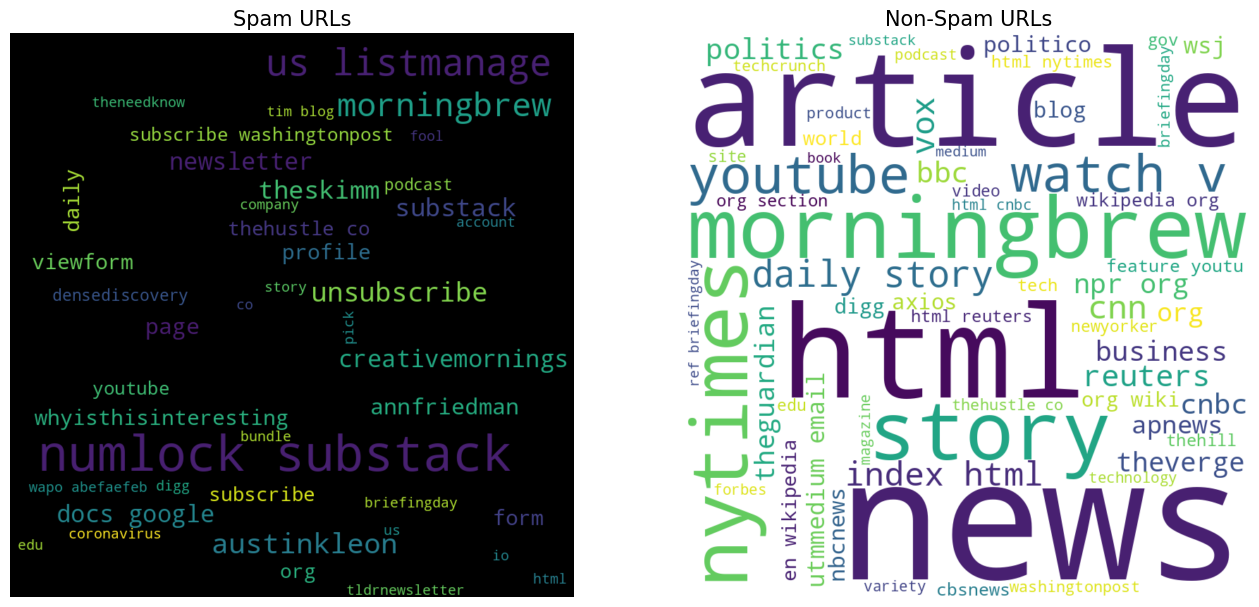

In [273]:
spam_urls = spam_data[spam_data['is_spam'] == 1]['url']
spam_words = ' '.join(spam_urls.apply(lambda x: ' '.join(x)))

non_spam_urls = spam_data[spam_data['is_spam'] == 0]['url']
non_spam_words = ' '.join(non_spam_urls.apply(lambda x: ' '.join(x)))

spam_wordcloud = WordCloud(width=800, height=800, background_color="black", max_words=1000,
                            min_font_size=20, random_state=42).generate(spam_words)

non_spam_wordcloud = WordCloud(width=800, height=800, background_color="white", max_words=1000,
                                min_font_size=20, random_state=42).generate(non_spam_words)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(spam_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Spam URLs', fontsize=15)

ax[1].imshow(non_spam_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Non-Spam URLs', fontsize=15)

plt.show()


In [275]:
tokens_list = spam_data['url']
tokens_list = [' '.join(tokens) for tokens in tokens_list]

In [276]:
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), stop_words='english')

X = vectorizer.fit_transform(tokens_list).toarray()
y = spam_data['is_spam']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [285]:
model = SVC(kernel='poly', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [286]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [287]:
accuracy_score(y_test, y_pred)


0.9514767932489452

In [288]:
from pickle import dump

dump(model, open("svm_classifier_poly_42.sav", "wb"))